In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [2]:
#designate input file
input_file = "/home/lussier/Projects/pain/pain_plsr.csv"

In [3]:
#read data and fill in na
dataset = pd.read_csv(input_file, header = 0,  sep=',')
dataset.shape

(62, 310)

In [4]:
dataset.describe()

,BMI,Chronological_Age,Education_Years,Income_Recode,CES_D_Score,EHI_Score,MoCA_Score,SF_MPQ_Score,SF_MPQ_Continuous_Pain_Score,SF_MPQ_Intermittent_Pain_Score,...,wm_rh_rostralanteriorcingulate,wm_rh_rostralmiddlefrontal,wm_rh_superiorfrontal,wm_rh_superiorparietal,wm_rh_superiortemporal,wm_rh_supramarginal,wm_rh_frontalpole,wm_rh_temporalpole,wm_rh_transversetemporal,wm_rh_insula
count,62.000000,62.000000,62.000000,60.000000,62.000000,62.000000,62.000000,61.000000,61.000000,61.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,28.732330,59.354839,15.225806,4.316667,7.612903,70.286739,27.258065,0.701937,1.117486,0.814208,...,1874.569355,11953.316129,16478.062903,11081.824194,6475.303226,8280.774194,319.014516,658.417742,594.816129,9584.550000
std,8.690616,22.811485,3.205627,1.751432,5.415082,41.242068,2.346504,0.926854,1.487710,1.284559,...,310.108454,2312.112382,2338.126584,1576.186972,955.309020,1226.722485,63.369134,106.984875,107.041746,1192.164287
min,18.152480,19.000000,12.000000,1.000000,0.000000,-80.000000,22.000000,0.000000,0.000000,0.000000,...,1339.400000,8026.300000,11974.500000,8416.400000,4850.400000,5675.900000,208.400000,404.200000,412.600000,7014.700000
25%,24.116114,60.000000,12.000000,3.000000,3.000000,70.000000,26.000000,0.136364,0.166667,0.000000,...,1620.425000,9976.125000,14802.300000,9959.925000,5750.175000,7284.450000,272.825000,580.725000,521.850000,8808.625000
50%,26.417409,68.500000,15.000000,5.000000,7.000000,80.000000,28.000000,0.318182,0.666667,0.166667,...,1829.850000,11860.050000,16533.400000,10901.600000,6432.850000,8317.550000,309.700000,663.600000,577.700000,9480.600000
75%,30.715199,73.750000,18.000000,6.000000,11.000000,90.000000,29.000000,0.954545,1.333333,1.000000,...,2083.600000,13776.450000,17971.925000,12257.825000,7106.850000,9135.200000,372.700000,735.000000,661.725000,10320.675000
max,74.618026,93.000000,22.000000,6.000000,21.000000,100.000000,30.000000,3.909091,6.000000,5.500000,...,2623.300000,19109.700000,22433.200000,14744.700000,8735.200000,10957.300000,545.600000,996.900000,1009.000000,12413.200000


In [5]:
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')

In [6]:
#select data
X = dataset[['Chronological_Age','CES_D_Score','EHI_Score', 'EstimatedTotalIntraCranialVol', 'Education_Years', 
             'PH_Anatomical_Pain_Sites', 'mri_pain_duration',
             'WOMAC_Score', 'WOMAC_interference',
             'Left_Cerebellum_White_Matter', 'Left_Cerebellum_Cortex', 
             'Right_Cerebellum_White_Matter', 'Right_Cerebellum_Cortex', 
            ]] 

In [7]:
plsr2 = PLSRegression(n_components=2)
plsr3 = PLSRegression(n_components=3)

In [8]:
y = dataset['VDT_Thenar_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [9]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 0.40000058138313227
Mean Squared Error with 2 components: 0.26052063946737286
Root Mean Squared Error with 2 components: 0.5104122250371487
R squared with 2 components: 0.14989358918772078

Mean Absolute Error with 3 components: 0.41048375821389266
Mean Squared Error with 3 components: 0.26915798080988423
Root Mean Squared Error with 3 components: 0.5188043762439598
R squared with 3 components: 0.12170903051837811


In [10]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 0.106720
CES_D_Score                       0.029774
EHI_Score                         0.000917
EstimatedTotalIntraCranialVol     0.102974
Education_Years                   0.149418
PH_Anatomical_Pain_Sites          0.005691
mri_pain_duration                -0.078573
WOMAC_Score                       0.161668
WOMAC_interference                0.122853
Left_Cerebellum_White_Matter      0.080094
Left_Cerebellum_Cortex            0.002654
Right_Cerebellum_White_Matter     0.079034
Right_Cerebellum_Cortex          -0.014483

Coefficients with 3 components:                                Coefficient
Chronological_Age                 0.098932
CES_D_Score                       0.044950
EHI_Score                        -0.054800
EstimatedTotalIntraCranialVol     0.168413
Education_Years                   0.183121
PH_Anatomical_Pain_Sites         -0.039061
mri_pain_duration               

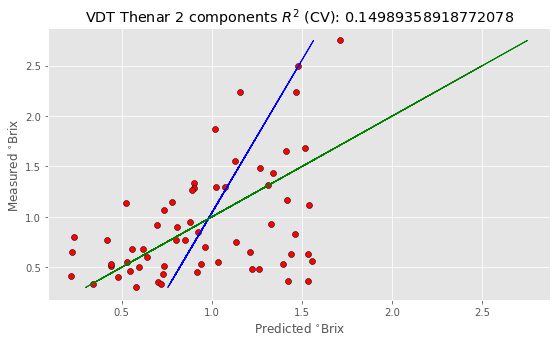

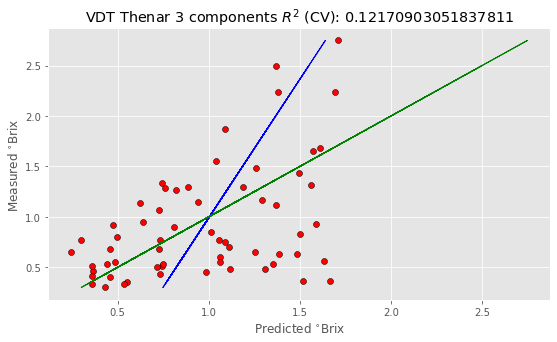

In [11]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('VDT Thenar 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('VDT Thenar 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [12]:
y = dataset['VDT_Metatarsal_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [13]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 1.3411730831679551
Mean Squared Error with 2 components: 3.2176838671624166
Root Mean Squared Error with 2 components: 1.7937903632148369
R squared with 2 components: 0.20580135758781637

Mean Absolute Error with 3 components: 1.3575263991274356
Mean Squared Error with 3 components: 3.217037011568839
Root Mean Squared Error with 3 components: 1.7936100500300614
R squared with 3 components: 0.2059610164777087


In [14]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 0.614496
CES_D_Score                       0.222738
EHI_Score                        -0.137194
EstimatedTotalIntraCranialVol     0.150264
Education_Years                   0.373684
PH_Anatomical_Pain_Sites          0.157398
mri_pain_duration                 0.243151
WOMAC_Score                       0.178457
WOMAC_interference                0.196825
Left_Cerebellum_White_Matter      0.321262
Left_Cerebellum_Cortex           -0.171580
Right_Cerebellum_White_Matter     0.251524
Right_Cerebellum_Cortex          -0.154489

Coefficients with 3 components:                                Coefficient
Chronological_Age                 0.743618
CES_D_Score                       0.326031
EHI_Score                        -0.401719
EstimatedTotalIntraCranialVol     0.167234
Education_Years                   0.326431
PH_Anatomical_Pain_Sites          0.072346
mri_pain_duration               

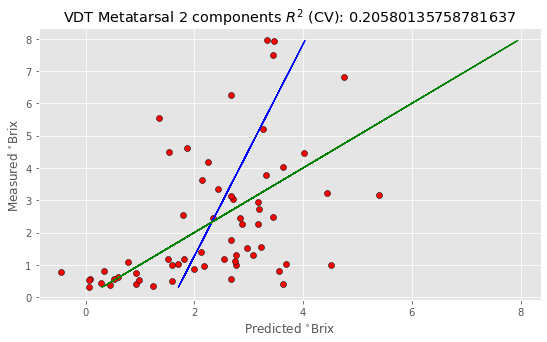

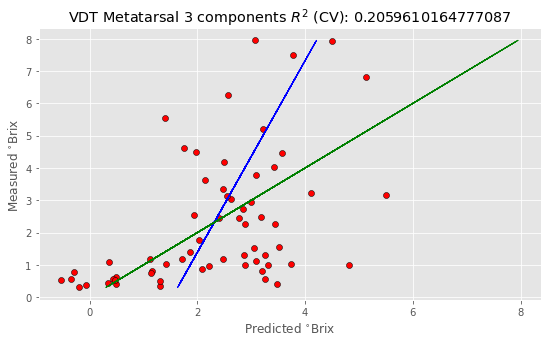

In [15]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('VDT Metatarsal 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('VDT Metatarsal 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [16]:
y = dataset['CDT_Thenar_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [17]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 0.6541237238330212
Mean Squared Error with 2 components: 0.7485023586618842
Root Mean Squared Error with 2 components: 0.8651603080712176
R squared with 2 components: 0.17523805526990743

Mean Absolute Error with 3 components: 0.6522512149064791
Mean Squared Error with 3 components: 0.7687134685618457
Root Mean Squared Error with 3 components: 0.876763062954779
R squared with 3 components: 0.15296777901313496


In [18]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                -0.186509
CES_D_Score                       0.018758
EHI_Score                        -0.056273
EstimatedTotalIntraCranialVol    -0.155853
Education_Years                  -0.220326
PH_Anatomical_Pain_Sites         -0.043614
mri_pain_duration                -0.217093
WOMAC_Score                      -0.086657
WOMAC_interference               -0.061832
Left_Cerebellum_White_Matter      0.118770
Left_Cerebellum_Cortex           -0.011385
Right_Cerebellum_White_Matter     0.083453
Right_Cerebellum_Cortex          -0.046447

Coefficients with 3 components:                                Coefficient
Chronological_Age                -0.174715
CES_D_Score                      -0.016345
EHI_Score                        -0.091305
EstimatedTotalIntraCranialVol    -0.176066
Education_Years                  -0.194510
PH_Anatomical_Pain_Sites          0.062699
mri_pain_duration               

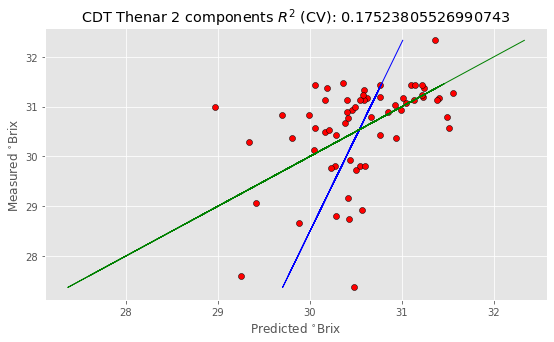

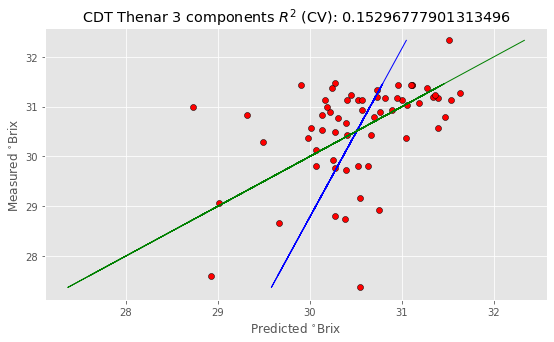

In [19]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CDT Thenar 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CDT Thenar 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [20]:
y = dataset['CPT_Thenar_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [21]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 6.386215913106592
Mean Squared Error with 2 components: 61.026629081462936
Root Mean Squared Error with 2 components: 7.811954242151123
R squared with 2 components: -0.18785545464260256

Mean Absolute Error with 3 components: 6.382109730961586
Mean Squared Error with 3 components: 63.203293176385024
Root Mean Squared Error with 3 components: 7.950049885150723
R squared with 3 components: -0.2302232268265536


In [22]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 0.099464
CES_D_Score                      -0.155599
EHI_Score                         0.065640
EstimatedTotalIntraCranialVol    -1.734107
Education_Years                   1.367220
PH_Anatomical_Pain_Sites         -0.287970
mri_pain_duration                -0.011338
WOMAC_Score                      -1.423490
WOMAC_interference               -1.433187
Left_Cerebellum_White_Matter      1.141092
Left_Cerebellum_Cortex           -0.677216
Right_Cerebellum_White_Matter     0.478609
Right_Cerebellum_Cortex          -0.948162

Coefficients with 3 components:                                Coefficient
Chronological_Age                -0.324020
CES_D_Score                       0.207402
EHI_Score                        -0.146838
EstimatedTotalIntraCranialVol    -2.809088
Education_Years                   1.555327
PH_Anatomical_Pain_Sites          0.006467
mri_pain_duration               

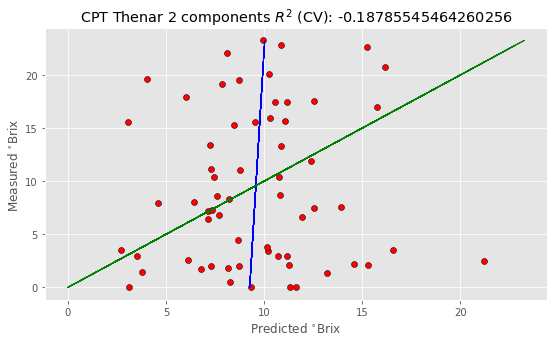

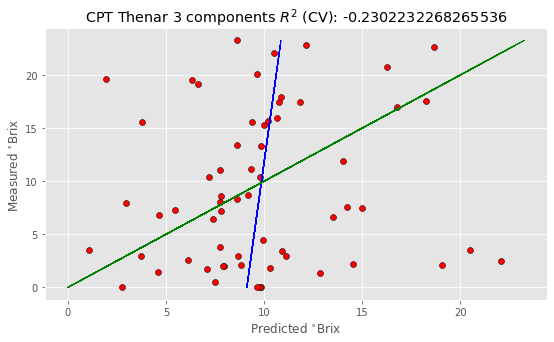

In [23]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CPT Thenar 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CPT Thenar 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [24]:
y = dataset['WDT_Thenar_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [25]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 0.4159983900427976
Mean Squared Error with 2 components: 0.2921922303651065
Root Mean Squared Error with 2 components: 0.5405480833053675
R squared with 2 components: 0.10164923329181141

Mean Absolute Error with 3 components: 0.39943476823289187
Mean Squared Error with 3 components: 0.280539368734426
Root Mean Squared Error with 3 components: 0.5296596725581683
R squared with 3 components: 0.1374761858674689


In [26]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 0.189205
CES_D_Score                      -0.005131
EHI_Score                         0.031302
EstimatedTotalIntraCranialVol     0.135194
Education_Years                   0.115575
PH_Anatomical_Pain_Sites          0.012350
mri_pain_duration                -0.020338
WOMAC_Score                       0.097843
WOMAC_interference                0.087534
Left_Cerebellum_White_Matter     -0.077412
Left_Cerebellum_Cortex            0.085153
Right_Cerebellum_White_Matter    -0.044547
Right_Cerebellum_Cortex           0.074814

Coefficients with 3 components:                                Coefficient
Chronological_Age                 0.233327
CES_D_Score                       0.011229
EHI_Score                         0.035797
EstimatedTotalIntraCranialVol     0.150526
Education_Years                   0.041127
PH_Anatomical_Pain_Sites         -0.044619
mri_pain_duration               

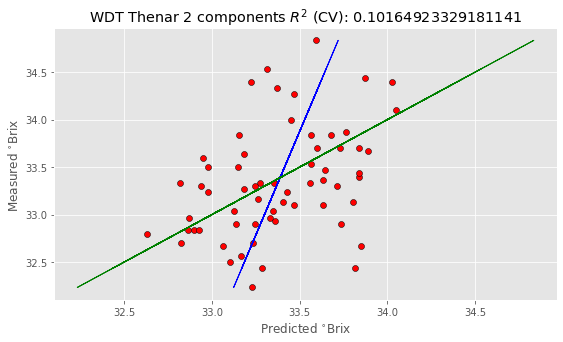

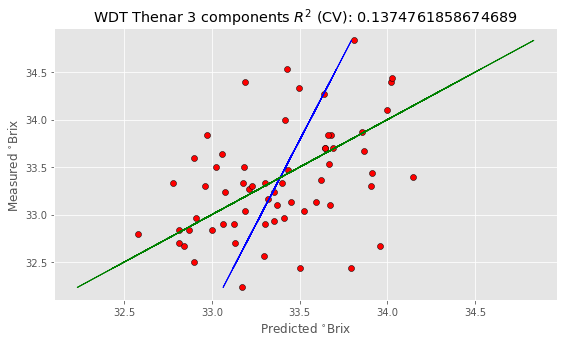

In [27]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('WDT Thenar 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('WDT Thenar 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [28]:
y = dataset['HPT_Thenar_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [29]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 4.439291416210492
Mean Squared Error with 2 components: 30.285657451926493
Root Mean Squared Error with 2 components: 5.503240631839252
R squared with 2 components: -0.6086682892504687

Mean Absolute Error with 3 components: 4.442768886526345
Mean Squared Error with 3 components: 31.168411336550772
Root Mean Squared Error with 3 components: 5.5828676624608224
R squared with 3 components: -0.6555570907784478


In [30]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                -0.869564
CES_D_Score                       0.160518
EHI_Score                         0.947156
EstimatedTotalIntraCranialVol     0.539751
Education_Years                  -1.242182
PH_Anatomical_Pain_Sites          0.029205
mri_pain_duration                -0.760327
WOMAC_Score                       0.148888
WOMAC_interference                0.089601
Left_Cerebellum_White_Matter     -0.582956
Left_Cerebellum_Cortex           -0.201354
Right_Cerebellum_White_Matter    -0.294720
Right_Cerebellum_Cortex          -0.017071

Coefficients with 3 components:                                Coefficient
Chronological_Age                -0.851021
CES_D_Score                      -0.172615
EHI_Score                         1.447288
EstimatedTotalIntraCranialVol     1.446693
Education_Years                  -1.190775
PH_Anatomical_Pain_Sites          0.396045
mri_pain_duration               

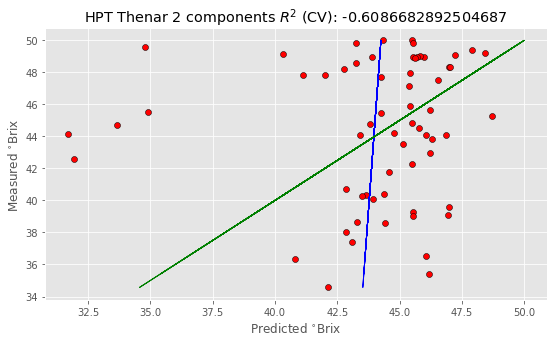

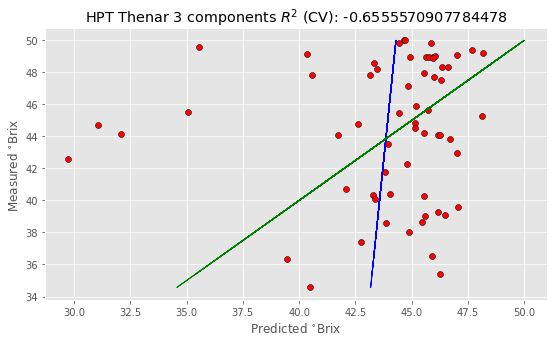

In [31]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('HPT Thenar 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('HPT Thenar 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [32]:
y = dataset['CDT_Metatarsal_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [33]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error CV with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error CV with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error CV with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared CV with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error CV with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error CV with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error CV with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with CV 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error CV with 2 components: 3.1872235852398187
Mean Squared Error CV with 2 components: 16.221457515635613
Root Mean Squared Error CV with 2 components: 4.027587058728292
R squared CV with 2 components: 0.11432135864456994

Mean Absolute Error CV with 3 components: 3.189596914341466
Mean Squared Error CV with 3 components: 15.493174888104917
Root Mean Squared Error CV with 3 components: 3.936137051489051
R squared with CV 3 components: 0.15408500919523238


In [34]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                -1.845942
CES_D_Score                       0.359125
EHI_Score                        -0.311804
EstimatedTotalIntraCranialVol    -1.167606
Education_Years                  -0.995969
PH_Anatomical_Pain_Sites          0.147099
mri_pain_duration                -0.358086
WOMAC_Score                       0.011271
WOMAC_interference                0.027446
Left_Cerebellum_White_Matter      0.381158
Left_Cerebellum_Cortex           -0.038648
Right_Cerebellum_White_Matter     0.036378
Right_Cerebellum_Cortex          -0.197384

Coefficients with 3 components:                                Coefficient
Chronological_Age                -2.967424
CES_D_Score                       0.236909
EHI_Score                        -0.448425
EstimatedTotalIntraCranialVol    -1.621096
Education_Years                   0.104472
PH_Anatomical_Pain_Sites          0.790287
mri_pain_duration               

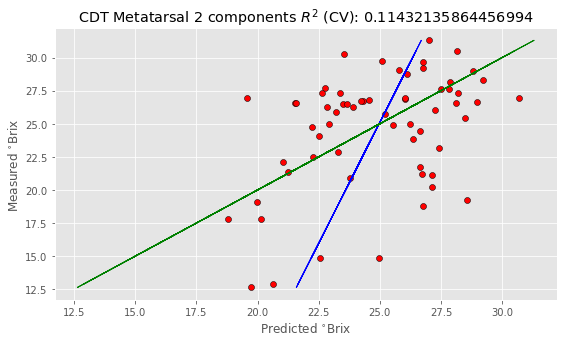

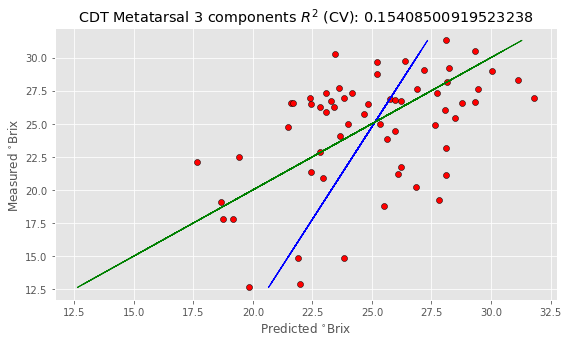

In [35]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CDT Metatarsal 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CDT Metatarsal 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [36]:
y = dataset['CPT_Metatarsal_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [37]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 7.5946501654650875
Mean Squared Error with 2 components: 80.18299747494937
Root Mean Squared Error with 2 components: 8.954495936396944
R squared with 2 components: -0.0694424657188677

Mean Absolute Error with 3 components: 7.754474639942564
Mean Squared Error with 3 components: 83.00821825071861
Root Mean Squared Error with 3 components: 9.110884603084303
R squared with 3 components: -0.10712390901465829


In [38]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                -0.047386
CES_D_Score                       0.792693
EHI_Score                         0.053994
EstimatedTotalIntraCranialVol    -3.286546
Education_Years                   1.509902
PH_Anatomical_Pain_Sites         -0.116983
mri_pain_duration                -1.034385
WOMAC_Score                      -0.790166
WOMAC_interference               -1.765946
Left_Cerebellum_White_Matter      0.987314
Left_Cerebellum_Cortex           -0.586554
Right_Cerebellum_White_Matter     1.691479
Right_Cerebellum_Cortex          -0.276897

Coefficients with 3 components:                                Coefficient
Chronological_Age                -0.169801
CES_D_Score                       1.129736
EHI_Score                        -0.407992
EstimatedTotalIntraCranialVol    -4.822565
Education_Years                   2.121761
PH_Anatomical_Pain_Sites          0.460900
mri_pain_duration               

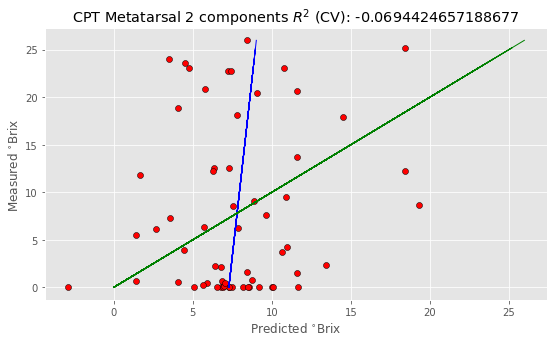

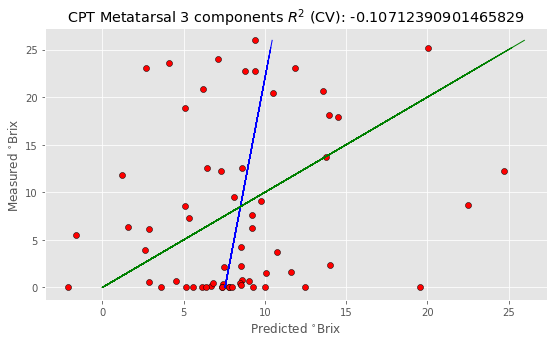

In [39]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CPT Metatarsal 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CPT Metatarsal 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [40]:
y = dataset['WDT_Metatarsal_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [41]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error CV with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error CV with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error CV with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared CV with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error CV with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error CV with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error CV with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared CV with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error CV with 2 components: 3.4727478175898234
Mean Squared Error CV with 2 components: 17.73917199208748
Root Mean Squared Error CV with 2 components: 4.211789642430814
R squared CV with 2 components: 0.21870944135275605

Mean Absolute Error CV with 3 components: 3.269914325020582
Mean Squared Error CV with 3 components: 16.456852113306137
Root Mean Squared Error CV with 3 components: 4.056704587877473
R squared CV with 3 components: 0.2751869598583787


In [42]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 2.074564
CES_D_Score                       0.778518
EHI_Score                         1.072063
EstimatedTotalIntraCranialVol     0.897170
Education_Years                   0.150036
PH_Anatomical_Pain_Sites          0.204224
mri_pain_duration                 0.865630
WOMAC_Score                       0.115145
WOMAC_interference                0.234079
Left_Cerebellum_White_Matter     -0.193884
Left_Cerebellum_Cortex           -0.108799
Right_Cerebellum_White_Matter     0.183146
Right_Cerebellum_Cortex          -0.069126

Coefficients with 3 components:                                Coefficient
Chronological_Age                 3.031687
CES_D_Score                       0.853824
EHI_Score                         1.054881
EstimatedTotalIntraCranialVol     1.134220
Education_Years                  -1.001273
PH_Anatomical_Pain_Sites         -0.340192
mri_pain_duration               

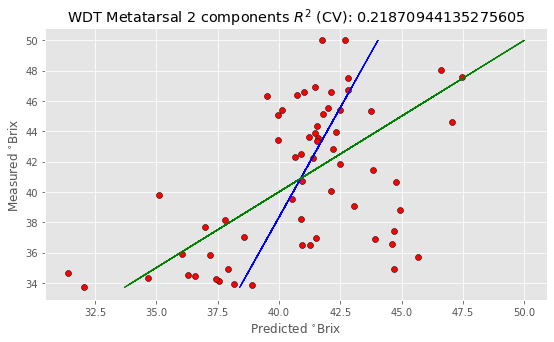

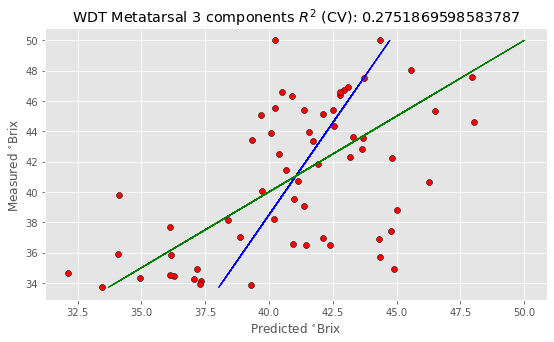

In [43]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('WDT Metatarsal 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('WDT Metatarsal 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [44]:
y = dataset['HPT_Metatarsal_Average']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [45]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 2.1542562102498573
Mean Squared Error with 2 components: 6.667845334789329
Root Mean Squared Error with 2 components: 2.5822171354844135
R squared with 2 components: -0.0456403447287681

Mean Absolute Error with 3 components: 2.268268117172789
Mean Squared Error with 3 components: 7.025728944240877
Root Mean Squared Error with 3 components: 2.6506091647470167
R squared with 3 components: -0.10176305333558289


In [46]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 0.505136
CES_D_Score                       0.138112
EHI_Score                         0.063281
EstimatedTotalIntraCranialVol     0.630033
Education_Years                  -0.130302
PH_Anatomical_Pain_Sites          0.146213
mri_pain_duration                 0.413451
WOMAC_Score                       0.338318
WOMAC_interference                0.347264
Left_Cerebellum_White_Matter     -0.313180
Left_Cerebellum_Cortex            0.289378
Right_Cerebellum_White_Matter    -0.237015
Right_Cerebellum_Cortex           0.343693

Coefficients with 3 components:                                Coefficient
Chronological_Age                 0.817611
CES_D_Score                       0.085424
EHI_Score                         0.115230
EstimatedTotalIntraCranialVol     0.858420
Education_Years                  -0.500024
PH_Anatomical_Pain_Sites         -0.130663
mri_pain_duration               

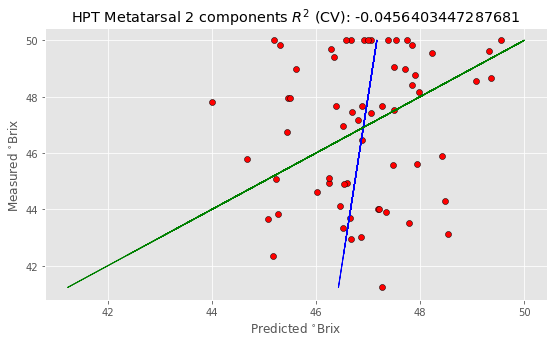

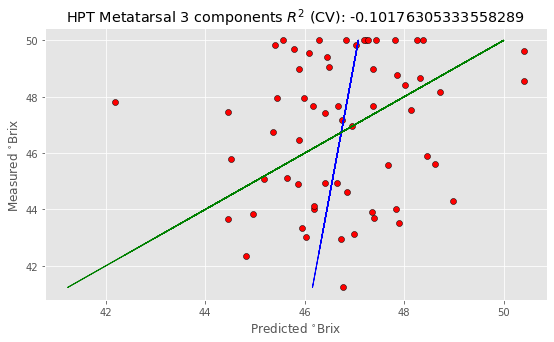

In [47]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('HPT Metatarsal 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('HPT Metatarsal 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [48]:
y = dataset['PPT_Trap_Average'] 

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [49]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 179.5017991752302
Mean Squared Error with 2 components: 56433.297832934295
Root Mean Squared Error with 2 components: 237.55693598153326
R squared with 2 components: -0.30706484015219626

Mean Absolute Error with 3 components: 189.1242468199458
Mean Squared Error with 3 components: 61916.64906205452
Root Mean Squared Error with 3 components: 248.8305629581192
R squared with 3 components: -0.4340660233721796


In [50]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                21.651771
CES_D_Score                      -8.804917
EHI_Score                       -28.777460
EstimatedTotalIntraCranialVol    15.057425
Education_Years                 -14.023913
PH_Anatomical_Pain_Sites         15.674057
mri_pain_duration               -33.665352
WOMAC_Score                      -8.619677
WOMAC_interference               -9.220163
Left_Cerebellum_White_Matter    -33.026717
Left_Cerebellum_Cortex           22.967253
Right_Cerebellum_White_Matter   -12.891454
Right_Cerebellum_Cortex          22.844302

Coefficients with 3 components:                                Coefficient
Chronological_Age                43.096123
CES_D_Score                      -4.487847
EHI_Score                       -27.596764
EstimatedTotalIntraCranialVol    18.865916
Education_Years                 -31.554800
PH_Anatomical_Pain_Sites         31.355524
mri_pain_duration               

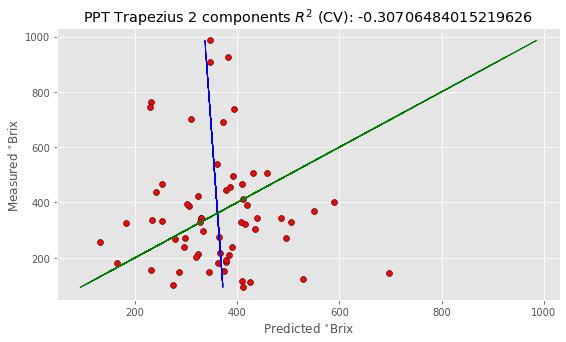

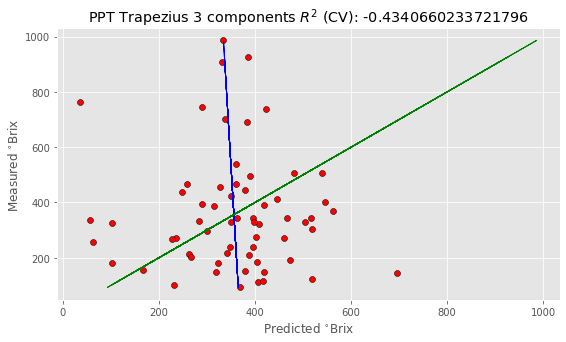

In [51]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('PPT Trapezius 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('PPT Trapezius 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [52]:
y = dataset['PPT_Quad_Average'] 

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [53]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 218.642520404671
Mean Squared Error with 2 components: 72300.25436971485
Root Mean Squared Error with 2 components: 268.8870662001333
R squared with 2 components: 0.01179218965164086

Mean Absolute Error with 3 components: 224.56647031746985
Mean Squared Error with 3 components: 76910.46131409188
Root Mean Squared Error with 3 components: 277.3273540675205
R squared with 3 components: -0.05122062474952083


In [54]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age               -18.476547
CES_D_Score                     -64.290944
EHI_Score                       -13.614368
EstimatedTotalIntraCranialVol    18.410549
Education_Years                   2.526544
PH_Anatomical_Pain_Sites        -14.741704
mri_pain_duration               -51.122193
WOMAC_Score                      -2.310289
WOMAC_interference                2.879529
Left_Cerebellum_White_Matter    -39.765269
Left_Cerebellum_Cortex           52.293939
Right_Cerebellum_White_Matter   -10.365753
Right_Cerebellum_Cortex          29.015324

Coefficients with 3 components:                                Coefficient
Chronological_Age               -16.058189
CES_D_Score                     -66.037016
EHI_Score                         1.216895
EstimatedTotalIntraCranialVol    21.275645
Education_Years                  -3.734429
PH_Anatomical_Pain_Sites        -11.720012
mri_pain_duration               

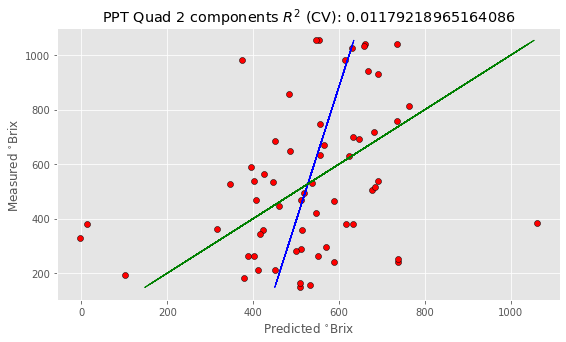

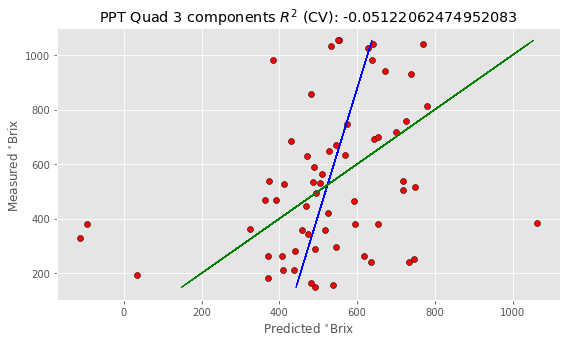

In [55]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('PPT Quad 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('PPT Quad 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [56]:
y = dataset['Temporal_Summation_Thenar']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [57]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 8.03150214327704
Mean Squared Error with 2 components: 108.91940237354773
Root Mean Squared Error with 2 components: 10.436445868855342
R squared with 2 components: 0.11807266561924956

Mean Absolute Error with 3 components: 8.12719391447859
Mean Squared Error with 3 components: 112.36863510364823
Root Mean Squared Error with 3 components: 10.600407308384344
R squared with 3 components: 0.09014400863962624


In [58]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 0.592803
CES_D_Score                       1.585440
EHI_Score                         0.037702
EstimatedTotalIntraCranialVol     0.831950
Education_Years                   1.350490
PH_Anatomical_Pain_Sites          1.802716
mri_pain_duration                 3.994481
WOMAC_Score                      -0.104309
WOMAC_interference               -0.011168
Left_Cerebellum_White_Matter     -0.502641
Left_Cerebellum_Cortex           -1.023670
Right_Cerebellum_White_Matter    -0.273851
Right_Cerebellum_Cortex          -0.387254

Coefficients with 3 components:                                Coefficient
Chronological_Age                -0.504266
CES_D_Score                       2.171910
EHI_Score                        -0.284221
EstimatedTotalIntraCranialVol     0.430798
Education_Years                   1.375893
PH_Anatomical_Pain_Sites          1.722562
mri_pain_duration               

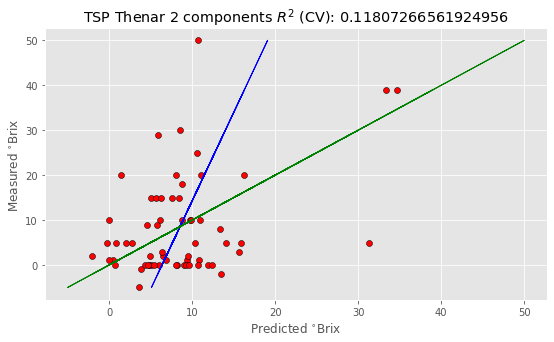

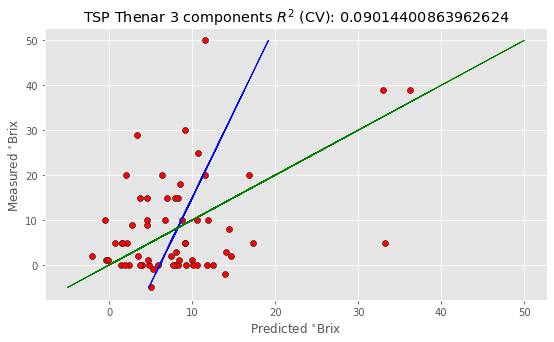

In [59]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('TSP Thenar 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('TSP Thenar 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [60]:
y = dataset['Temporal_Summation_Metatarsal']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [61]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 13.58076483197057
Mean Squared Error with 2 components: 303.4393985536148
Root Mean Squared Error with 2 components: 17.419512006758822
R squared with 2 components: -0.19079300854600634

Mean Absolute Error with 3 components: 13.746914915881925
Mean Squared Error with 3 components: 297.68229988359656
Root Mean Squared Error with 3 components: 17.25347211095774
R squared with 3 components: -0.16820031663307433


In [62]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                 2.767182
CES_D_Score                       1.631276
EHI_Score                        -4.585528
EstimatedTotalIntraCranialVol     0.318653
Education_Years                   3.091056
PH_Anatomical_Pain_Sites         -0.252002
mri_pain_duration                 2.880431
WOMAC_Score                       1.421224
WOMAC_interference                2.107236
Left_Cerebellum_White_Matter      1.224941
Left_Cerebellum_Cortex           -2.415200
Right_Cerebellum_White_Matter     0.990954
Right_Cerebellum_Cortex          -1.312310

Coefficients with 3 components:                                Coefficient
Chronological_Age                 2.135122
CES_D_Score                       2.321277
EHI_Score                        -5.657958
EstimatedTotalIntraCranialVol    -0.231606
Education_Years                   2.723279
PH_Anatomical_Pain_Sites         -1.355660
mri_pain_duration               

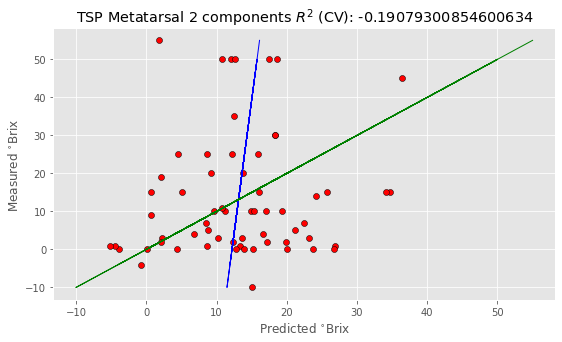

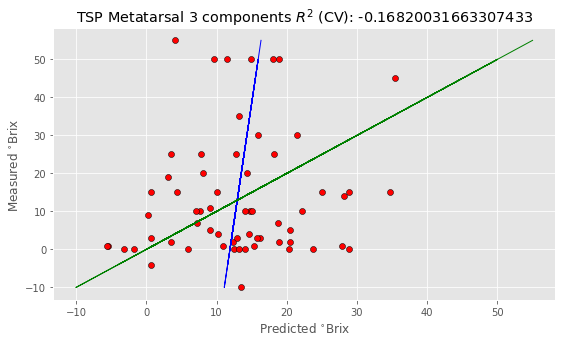

In [63]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('TSP Metatarsal 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('TSP Metatarsal 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

In [64]:
y = dataset['CPM']

plsr2.fit(X, y)
plsr3.fit(X, y)

y_pred2 = plsr2.predict(X)
y_pred3 = plsr3.predict(X)

In [65]:
# Cross-validation
y_cv2 = cross_val_predict(plsr2, X, y, cv=10)
y_cv3 = cross_val_predict(plsr3, X, y, cv=10)

# Calculate scores based on cv
print('Mean Absolute Error with 2 components:', metrics.mean_absolute_error(y, y_cv2)) 
print('Mean Squared Error with 2 components:', metrics.mean_squared_error(y, y_cv2))  
print('Root Mean Squared Error with 2 components:', np.sqrt(metrics.mean_squared_error(y, y_cv2)))
print('R squared with 2 components:', metrics.r2_score(y, y_cv2))

print('\nMean Absolute Error with 3 components:', metrics.mean_absolute_error(y, y_cv3))  
print('Mean Squared Error with 3 components:', metrics.mean_squared_error(y, y_cv3)) 
print('Root Mean Squared Error with 3 components:', np.sqrt(metrics.mean_squared_error(y, y_cv3)))
print('R squared with 3 components:', metrics.r2_score(y, y_cv3))

Mean Absolute Error with 2 components: 5.6823446542118266
Mean Squared Error with 2 components: 56.84665039017479
Root Mean Squared Error with 2 components: 7.539671769392537
R squared with 2 components: -0.441331288699619

Mean Absolute Error with 3 components: 6.203231955420182
Mean Squared Error with 3 components: 66.6751043350238
Root Mean Squared Error with 3 components: 8.165482492481617
R squared with 3 components: -0.6905290530889612


In [66]:
#view selected coefficients
coeff_df2 = pd.DataFrame(plsr2.coef_, X.columns, columns=['Coefficient'])  
print('Coefficients with 2 components:',coeff_df2)

coeff_df3 = pd.DataFrame(plsr3.coef_, X.columns, columns=['Coefficient'])  
print('\nCoefficients with 3 components:',coeff_df3)

Coefficients with 2 components:                                Coefficient
Chronological_Age                -0.085193
CES_D_Score                       0.355681
EHI_Score                         0.066986
EstimatedTotalIntraCranialVol     0.782229
Education_Years                  -0.447564
PH_Anatomical_Pain_Sites         -0.899582
mri_pain_duration                 0.221121
WOMAC_Score                      -0.641606
WOMAC_interference               -0.678714
Left_Cerebellum_White_Matter     -0.512741
Left_Cerebellum_Cortex            0.029933
Right_Cerebellum_White_Matter    -0.145641
Right_Cerebellum_Cortex           0.304592

Coefficients with 3 components:                                Coefficient
Chronological_Age                 0.207127
CES_D_Score                       0.531354
EHI_Score                         0.345747
EstimatedTotalIntraCranialVol     1.142939
Education_Years                  -0.799105
PH_Anatomical_Pain_Sites         -1.247226
mri_pain_duration               

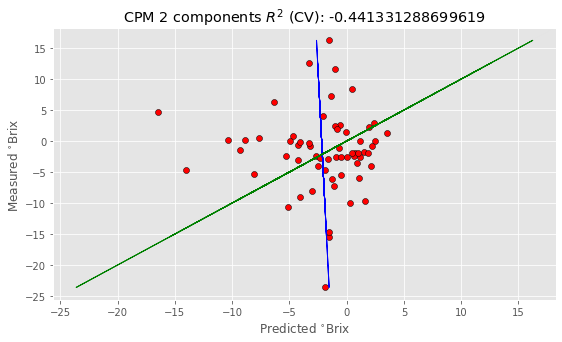

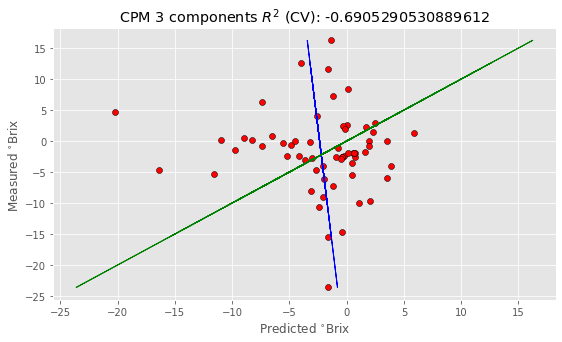

In [67]:
# Plot regression 
z = np.polyfit(y, y_cv2, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv2, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CPM 2 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv2)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()

# Plot regression 
z = np.polyfit(y, y_cv3, 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_cv3, y, c='red', edgecolors='k')
    ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('CPM 3 components $R^{2}$ (CV): '+str(metrics.r2_score(y, y_cv3)))
    plt.xlabel('Predicted $^{\circ}$Brix')
    plt.ylabel('Measured $^{\circ}$Brix')
        
    plt.show()